### Initial Attempt in Implementing Perceptron
- Personally implemented this code using the high-level/formal details provided by the book


### Steps in Training Perceptron

1. Initialize the weights and bias to 0 or small random numbers
2. For each training example, $x^{(i)}$
   
   a. Compute the output value, $y^{(i)}$

   - $z = w^T x + b$
   - $\sigma(z) = 1$ if $z >= 0$ and $\sigma(z) = 0$ otherwise

   
   b. Update the weights and bias unit

   - $w_j := w_j + \Delta w_j$

   - $b := b + \Delta b$



In [140]:
import numpy as np


class PerceptronClassifier:

    def __init__(self, n_iter=100, lr=0.01, thresh=0.5):
        self.n_iter = n_iter
        self.lr = lr
        self.thresh = 0.5
        np.random.seed(69)

    def weights_delta(self, X, y, y_pred):
        return (self.lr * (y - y_pred)) @ X
    
    def update_weights(self, X, y, y_pred):
        self.weights = self.weights + self.weights_delta(X, y, y_pred)

    def bias_delta(self, y, y_pred):
        return self.lr * np.mean(y - y_pred)

    def update_bias(self, y, y_pred):
        self.bias = self.bias + self.bias_delta(y, y_pred)

    def mean_absolute_error(self, y, y_pred):
        return np.mean(np.abs(y - y_pred))
    
    def unit_step(self, X):
        return np.where(X - self.thresh >= 0, 1, 0)

    def predict(self, X):
        return self.unit_step(self.weights @ X.T + self.bias).reshape(-1)

    def fit(self, X, y):
        self.num_feats = X.shape[1]
        self.weights = np.random.rand(1, self.num_feats)
        self.bias = np.random.rand(1)[0]
        self.loss_history = []

        for curr_iter in range(1, self.n_iter + 1):
            y_pred = self.predict(X)
            err_rate = self.mean_absolute_error(y, y_pred)

            print(f'[{curr_iter}/{self.n_iter}] Prediction Error (MAE) = {err_rate}')
            self.loss_history.append(err_rate)

            self.update_weights(X, y, y_pred)
            self.update_bias(y, y_pred)


In [141]:
def gen_xor_dataset(n_samples):
    X = np.random.choice([0, 1], size=(n_samples, 2))
    # Generating actual XOR Results
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(np.float32)
    return X, y.reshape(-1)


### XOR Dataset

[1/1000] Prediction Error (MAE) = 0.25
[2/1000] Prediction Error (MAE) = 0.5
[3/1000] Prediction Error (MAE) = 0.25
[4/1000] Prediction Error (MAE) = 0.5
[5/1000] Prediction Error (MAE) = 0.3125
[6/1000] Prediction Error (MAE) = 0.0625
[7/1000] Prediction Error (MAE) = 0.0625
[8/1000] Prediction Error (MAE) = 0.3125
[9/1000] Prediction Error (MAE) = 0.5
[10/1000] Prediction Error (MAE) = 0.3125
[11/1000] Prediction Error (MAE) = 0.0625
[12/1000] Prediction Error (MAE) = 0.0625
[13/1000] Prediction Error (MAE) = 0.0625
[14/1000] Prediction Error (MAE) = 0.0625
[15/1000] Prediction Error (MAE) = 0.0625
[16/1000] Prediction Error (MAE) = 0.0625
[17/1000] Prediction Error (MAE) = 0.3125
[18/1000] Prediction Error (MAE) = 0.5
[19/1000] Prediction Error (MAE) = 0.3125
[20/1000] Prediction Error (MAE) = 0.0625
[21/1000] Prediction Error (MAE) = 0.0625
[22/1000] Prediction Error (MAE) = 0.0625
[23/1000] Prediction Error (MAE) = 0.0625
[24/1000] Prediction Error (MAE) = 0.0625
[25/1000] Predict

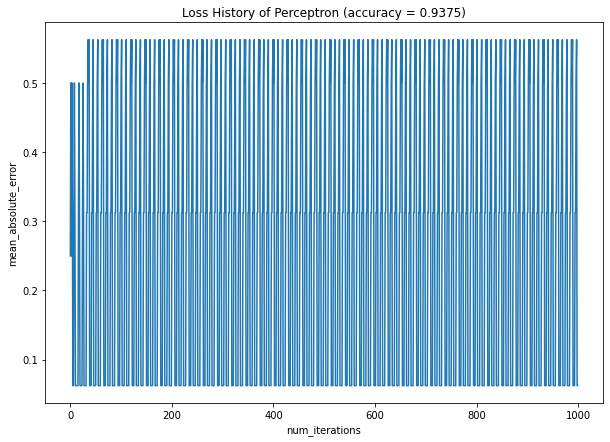

In [142]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_samples = 16
n_iter = 1000
lr = 0.1
perceptron = PerceptronClassifier(n_iter=n_iter, lr=lr)

X, y = gen_xor_dataset(n_samples)

perceptron.fit(X,y)


y_pred = perceptron.predict(X)
acc_score = accuracy_score(y, y_pred)

print('Accuracy Score = ', accuracy_score(y, y_pred))

total_iterations = perceptron.n_iter


plt.figure(figsize=(10,7))
plt.plot(np.arange(total_iterations), perceptron.loss_history)

plt.xlabel('num_iterations')
plt.ylabel('mean_absolute_error')
plt.title(f'Loss History of Perceptron (accuracy = {acc_score})')
plt.show()



In [125]:
print(perceptron.weights)
print(perceptron.bias)
# print(len(perceptron.bias))

[[-0.01328841  0.09875603]]
0.5047544018090888


### Iris Dataset

In [143]:
import pandas as pd

df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/iris/iris.data',
header=None, encoding='utf-8')

[1/20] Prediction Error (MAE) = 0.3333333333333333
[2/20] Prediction Error (MAE) = 0.6666666666666666
[3/20] Prediction Error (MAE) = 0.3333333333333333
[4/20] Prediction Error (MAE) = 0.3333333333333333
[5/20] Prediction Error (MAE) = 0.14
[6/20] Prediction Error (MAE) = 0.23333333333333334
[7/20] Prediction Error (MAE) = 0.4066666666666667
[8/20] Prediction Error (MAE) = 0.3333333333333333
[9/20] Prediction Error (MAE) = 0.0
[10/20] Prediction Error (MAE) = 0.0
[11/20] Prediction Error (MAE) = 0.0
[12/20] Prediction Error (MAE) = 0.0
[13/20] Prediction Error (MAE) = 0.0
[14/20] Prediction Error (MAE) = 0.0
[15/20] Prediction Error (MAE) = 0.0
[16/20] Prediction Error (MAE) = 0.0
[17/20] Prediction Error (MAE) = 0.0
[18/20] Prediction Error (MAE) = 0.0
[19/20] Prediction Error (MAE) = 0.0
[20/20] Prediction Error (MAE) = 0.0
Accuracy Score =  1.0


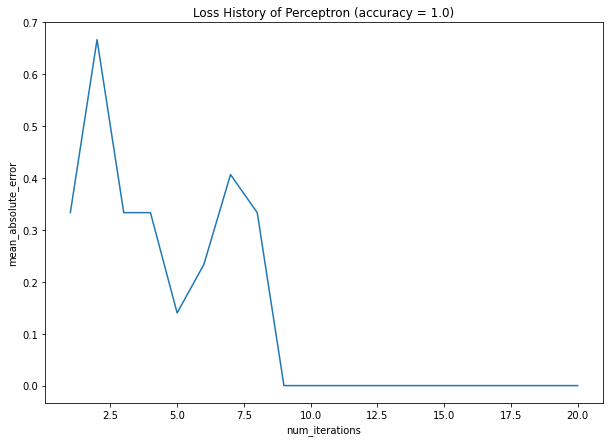

In [158]:
y = np.where(df[4].to_numpy() == 'Iris-setosa', 0, 1)
X = df[[0,1,2,3]].to_numpy()

n_iter = 20
perceptron_iris = PerceptronClassifier(n_iter=n_iter, lr=lr)

perceptron_iris.fit(X,y)


y_pred = perceptron_iris.predict(X)
acc_score = accuracy_score(y, y_pred)

print('Accuracy Score = ', accuracy_score(y, y_pred))

total_iterations = perceptron_iris.n_iter


plt.figure(figsize=(10,7))
plt.plot(np.arange(1, total_iterations + 1), perceptron_iris.loss_history)

plt.xlabel('num_iterations')
plt.ylabel('mean_absolute_error')
plt.title(f'Loss History of Perceptron (accuracy = {acc_score})')
plt.show()


### Findings

- I forgot adding the bias $b$ component. After fixing this bug, my model's performance significantly increased to 100% accuracy.
- Since XOR is linearly separable. This is guaranteed to converge (For later theoretical readings). You can observe this by the fact that the error rates becomes flat zero.
- I made another error creates a bias vector with a length of the number of samples of X input. This implies that it tends to memorize the threshold of each dataset. How can I properly structure the bias vector to begin with?

### References
- Rosenblatt Perceptron paper
- An Adaptive “Adaline” Neuron Using Chemical “Memistors”, Technical Report Number 1553-2 by B.
Widrow and colleagues, Stanford Electron Labs, Stanford, CA, October 1960